# Пример уменьшения размерности

Рассмотрим основные моменты уменьшения размерности на примере из лекции (рукописные цифры). 

Подключим требуемые библиотеки.

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files

Импортируем датасет.

In [15]:
# upload homework.csv
X = np.loadtxt(open("homework.csv", "rb"), delimiter=",")

In [20]:
X[0]

array([ -2.51983488,  -8.43688037,   6.9085098 ,  -5.45965612,
         0.80754111,   6.73046028,  -4.81608355,  20.78924415,
       -15.97031939,  11.53824102])

Уменьшим размерность при помощи библиотеки __sklearn__. Отдельно обращаем ваше внимание на параметр __svd_solver__, он отвечает за метод оптимизации. Дело в том, что в Python оптимизационные задачи решаются численно. При этом могут использоваться различные алгоритмы, а значит результаты могут несколько отличаться. Поэтому, чтобы получать одинаковые результаты, нужно использовать параметры модели, указанные в задании.

In [21]:
pca = PCA(n_components=2, svd_solver='full') #Создание объекта класса PCA. В качестве параметров выступает количество ГК и метод оптимизации
X_transformed = pca.fit(X).transform(X) #X_transformed -- ndarray объектов, где каждый объект описывается двумя ГК
X_transformed[0]

array([-14.27903089, -16.39322252])

Изобразим объекты в виде точек на плоскости.

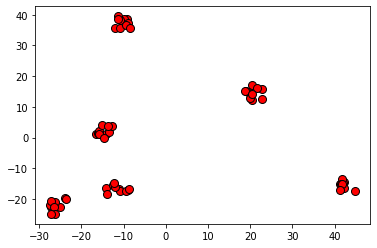

In [24]:
plt.plot(X_transformed[:, 0], X_transformed[:, 1], 'o', markerfacecolor='red', markeredgecolor='k', markersize=8)

Для дальнейшего анализа нам удобно будет построить не 2, а все 10 Главных Компонеты (хотя, конечно, это можно было сделать и сразу, а картинку строить лишь по первым двум).

In [25]:
pca = PCA(n_components=10, svd_solver='full')
X_full = pca.fit(X).transform(X)

In [31]:
X_full[0:3]

array([[-1.42790309e+01, -1.63932225e+01, -2.32215849e+01,
        -1.29385197e+01, -6.18989347e+00,  1.08971357e+00,
        -1.27563838e+00, -4.50180420e-03, -6.74475855e-01,
         5.58473950e-01],
       [-9.08536227e+00, -1.71274267e+01, -2.52183669e+01,
        -1.40870279e+01, -5.08469215e+00,  1.71698077e+00,
        -6.62744111e-01, -1.94786991e-03,  1.71302683e+00,
        -1.74690139e-01],
       [-1.41677470e+01,  1.02920839e+00,  3.21342920e+01,
        -1.12827525e+01,  5.72292725e+00, -2.06300257e-02,
        -2.55782625e+00,  7.00801906e-01, -1.41452957e+00,
         1.06955690e+00]])

Найдем долю объясненной дисперсии в зависимости от количества используемых ГК.

In [26]:
explained_variance = np.round(np.cumsum(pca.explained_variance_ratio_),3)
explained_variance

array([0.365, 0.654, 0.874, 0.945, 0.994, 0.996, 0.997, 0.999, 0.999,
       1.   ])

Построим график зависимости доли объясненной дисперсии от количества используемых ГК. Подробный описание произведено в лекции.

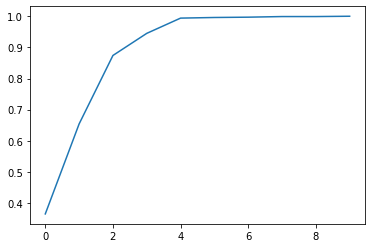

In [28]:
plt.plot(np.arange(10), explained_variance, ls = '-')